In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
dt=pd.read_csv('india_shares.csv')
dt

,Date,Mobile,Desktop,Tablet
0,2009-01,2.14,97.86,0.00
1,2009-02,2.46,97.54,0.00
2,2009-03,2.76,97.24,0.00
3,2009-04,2.49,97.51,0.00
4,2009-05,2.76,97.24,0.00
...,...,...,...,...
175,2023-08,78.01,21.55,0.44
176,2023-09,77.18,22.37,0.45
177,2023-10,79.10,20.45,0.45
178,2023-11,79.32,20.24,0.44


In [3]:
t = list(range(180))  # Independent variable

# Create DataFrame from a dictionary
data = pd.DataFrame({
    't': t,
    'Mobile': dt['Mobile'].values  # Use .values to ensure compatibility
})

print(data.head())

   t  Mobile
0  0    2.14
1  1    2.46
2  2    2.76
3  3    2.49
4  4    2.76


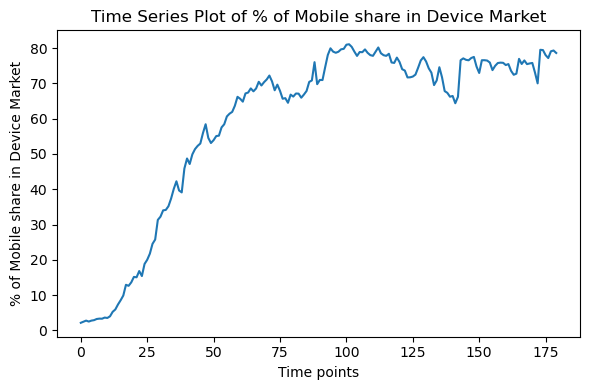

In [4]:
plt.figure(figsize=(6,4))
plt.plot(data['t'],data['Mobile'])
plt.title('Time Series Plot of % of Mobile share in Device Market')
plt.xlabel('Time points')
plt.ylabel('% of Mobile share in Device Market')
plt.tight_layout()
plt.show()

In [5]:
#This function returns sequence of time points and the time point which follows it immediately 
def create_sequences(values, time_steps=10):
    X, y = [], []
    for i in range(len(values) - time_steps):
        X.append(values[i:i+time_steps])
        y.append(values[i+time_steps])
    return np.array(X), np.array(y)

# Convert entire series to numpy
series = data['Mobile'].values.reshape(-1, 1)

# Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

# Create sequences
X, y = create_sequences(series_scaled, time_steps=10)  #y is the value immediately after each input sequence

# Train-test split
split = int(len(X) * 0.8) #80% of the dataset is taken as the training dataset
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]  


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

# Training the model based on our dataset
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.5905 - val_loss: 0.5902
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3715 - val_loss: 0.2634
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1213 - val_loss: 0.0055
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - val_loss: 0.0238
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127 - val_loss: 0.0094
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0070 - val_loss: 0.0011
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 13/20


In [7]:
y_pred=model.predict(X_test)  #predicted values

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [8]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [13]:
print("Mean Absolute Error=",round(mean_absolute_error(y_pred,y_test),4))
print("Mean Absolute Percentage Error=",round(mean_absolute_percentage_error(y_pred,y_test),4)*100)

Mean Absolute Error= 0.0239
Mean Absolute Percentage Error= 2.59


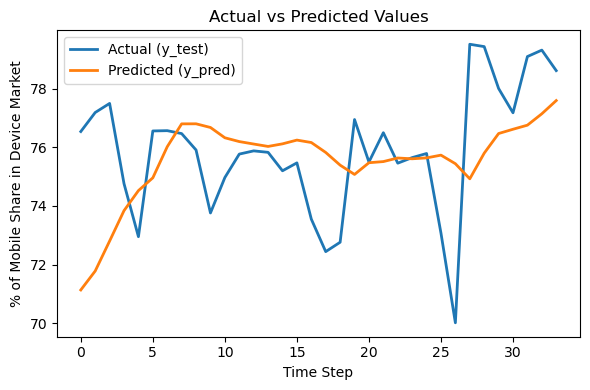

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Inverse transform if data was scaled
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(y_test_inv, label='Actual (y_test)', linewidth=2)
plt.plot(y_pred_inv, label='Predicted (y_pred)', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('% of Mobile Share in Device Market')
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
#On applying LSTM model to the dataset , we get a lower MAE and MAPE value than ARIMA model.